# 1.1 EDA

## Instructions :
1. Do the EDA for understanding the dataset's content. Make different plots on the data and don't limit yourself to the following question. 
1. Which are the 10 movies with highest number of ratings.
1. Calculate the mean ratings for the 10 movies with most ratings. 
1. Make a plot on the years and number of movies in the dataset. 
1. Make a plot on the number of ratings and movie ID. 
1. Calculate the mean rating for the 10 movies with most ratings and make a bar plot over that data.

## Steps :
1. Reading in the data 
2. Data Checking ( info, describe ..)
3. Making plots to understand the data : 

    3. 1. Ratings' distribution 
    3. 2. Max ratings by user 
    3. 3. Mean user rating distribution 
    3. 4. Max user rating distribution
    3. 5. Mean movie rating distribution 
    3. 6. Max movie rating distribution

4. Printing out the 10 most rated movies 
5. Plotting the mean rating for the 10 movies 
6. Plotting the distribution of number of movies over the years 
7. Plotting the number of ratings by movie ID. 

For each of these questions, a separate dataframe will be copied, the original dataframe will remain untouched.

### 1. Reading in the data

In [9]:
#imports 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [10]:
#file paths 
movies = "Data/ml-latest/movies.csv"
ratings = "Data/ml-latest/ratings.csv"

#reading the files as DFs 
movies_df = pd.read_csv(movies,usecols=["movieId","title"],dtype={"movieId":"int32","title":"str"})
ratings_df = pd.read_csv(ratings,usecols=["userId","movieId","rating"],dtype={"movieId":"int32","rating":"float32","userId":"int32"})


### 2. Data Checking 

In [11]:
#movies_df.head()
#movies_df.describe()
#movies_df.info()

#ratings_df.head()
#ratings_df.describe()
ratings_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int32  
 1   movieId  int32  
 2   rating   float32
dtypes: float32(1), int32(2)
memory usage: 317.6 MB


### 3. Making plots to understand the data : 

#### 3. 1. Ratings' distribution 
    

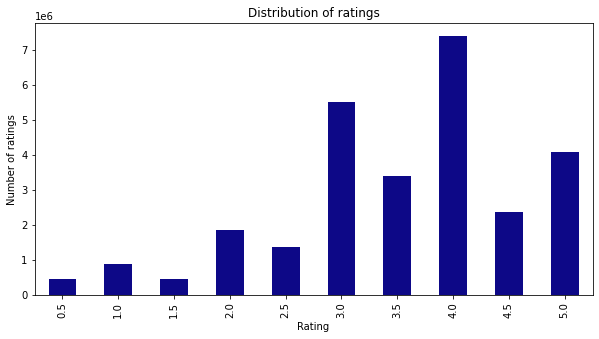

In [12]:
#ditribution of ratings 

#Creating a dataframe with ratings and number of occurences
rating_distribution = pd.DataFrame(ratings_df["rating"].value_counts()).rename(columns={"rating":"Count"}).reset_index().rename(columns = {"index":"Rating"}).sort_values("Rating",ascending=True)

rating_distribution.plot(kind="bar",
                            x="Rating",
                            y="Count",
                            colormap ="plasma",
                            legend = False,
                            ylabel="Number of ratings", 
                            title = "Distribution of ratings", 
                            figsize = (10,5))
plt.show()

#### 3. 2. Max ratings by user 


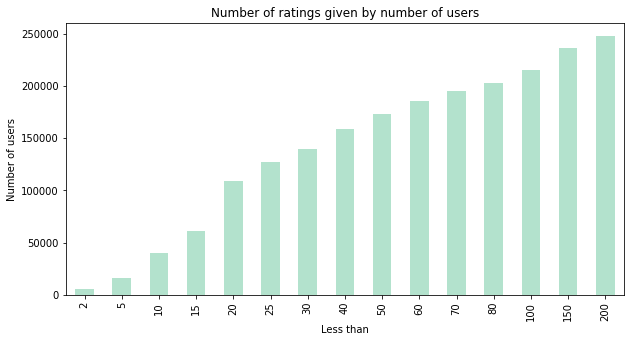

In [13]:
# number of users giving less than X ratings 

#Creating a dataframe with number of movies rated for each user
number_ratings_distribution = pd.DataFrame(ratings_df[["userId"]].value_counts()).rename(columns={0:"Number of ratings"})

# our values we want to check, in this case we check less than 2 ratings, 5 ratings .. etc
intervals = [2,5,10,15,20,25,30,40,50,60,70,80,100,150,200]

# list with number of users against max ratings
number_users = [len(number_ratings_distribution[number_ratings_distribution["Number of ratings"]<X]) for X in intervals]

# Dataframe with the 2 lists
number_ratings_distribution = pd.DataFrame({"Less than":intervals,"Number of users":number_users})


#Plot the dataframe axes
number_ratings_distribution.plot(kind="bar", 
                                    x="Less than", 
                                    y="Number of users", 
                                    title ="Number of ratings given by number of users",
                                    figsize = (10,5),
                                    colormap = "Pastel2",
                                    legend=False,
                                    ylabel="Number of users")

plt.show()

#### 3. 3. Mean user rating distribution 


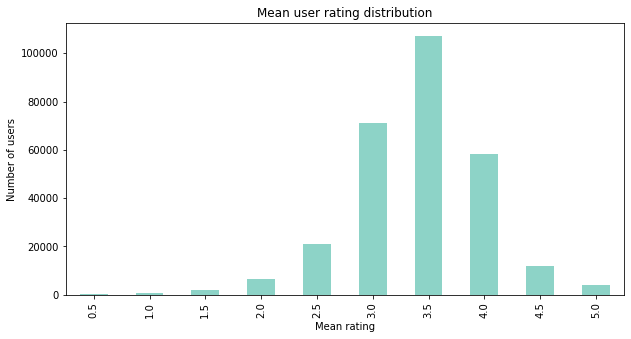

In [14]:
# mean rating for users distribution 

# create new dataframe with userId and mean rating 
mean_rating_per_user = ratings_df[["userId","rating"]].groupby("userId").mean()

# rounding down the mean rating to 0.5 
mean_rating_per_user["Mean rating"] = (2 * mean_rating_per_user["rating"]//1)/2

# create dataframe with mean rating against number of users
mean_rating_per_user = pd.DataFrame(mean_rating_per_user.groupby("Mean rating").size()).rename(columns={0:"Number of users"})

# plot the data 
mean_rating_per_user.plot(kind="bar", 
                            legend=False, 
                            ylabel="Number of users",
                            title="Mean user rating distribution", 
                            figsize=(10,5), 
                            colormap = 'Set3')

plt.show()

#### 3. 4. Max user rating distribution

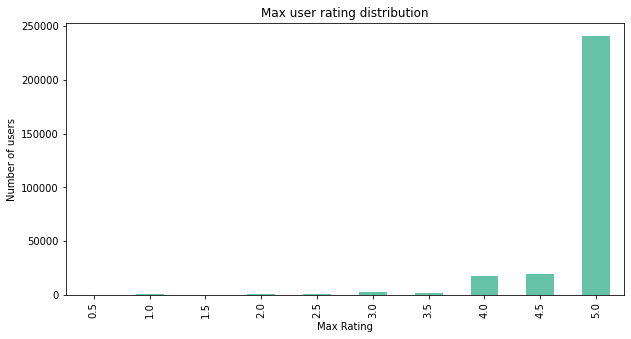

In [15]:
#max rating per user

# creating a dataframe with userId and max rating
max_rating_per_user = ratings_df[["userId","rating"]].groupby("userId").max().rename(columns={"rating":"Max Rating"})

# grouping by max rating and creating a column for number of users for each max rating
max_rating_per_user = pd.DataFrame(max_rating_per_user.groupby("Max Rating").size()).rename(columns={0:"Number of users"})

#plot the data
max_rating_per_user.plot(kind="bar", 
                            legend=False, 
                            ylabel="Number of users",
                            title="Max user rating distribution", 
                            figsize=(10,5), 
                            colormap="Set2"
                            )

plt.show()

#### 3. 5. Mean movie rating distribution 


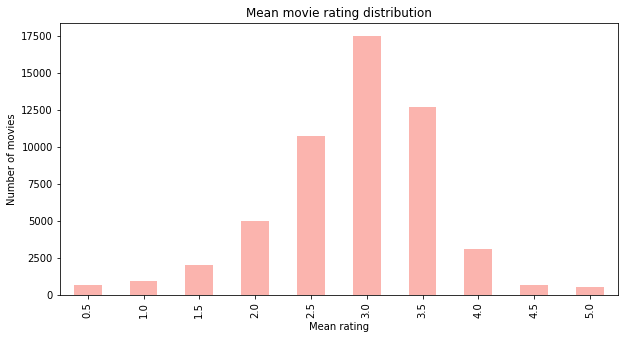

In [16]:
#mean rating per movie distribution

# creating a dataframe with movieId and mean rating 
mean_rating_per_movie = ratings_df[["movieId","rating"]].groupby("movieId").mean()

# rounding down mean rating to 0.5
mean_rating_per_movie["Mean rating"] = (2 * mean_rating_per_movie["rating"]//1)/2

# grouping mean ratings and making a new column for Number of users by mean rating
mean_rating_per_movie = pd.DataFrame(mean_rating_per_movie.groupby("Mean rating").size()).rename(columns={0:"Number of movies"})

# plot the data
mean_rating_per_movie.plot(kind="bar", 
                            legend=False, 
                            ylabel = "Number of movies", 
                            title = "Mean movie rating distribution", 
                            figsize = (10,5), 
                            colormap = "Pastel1")

plt.show()

#### 3. 6. Max movie rating distribution



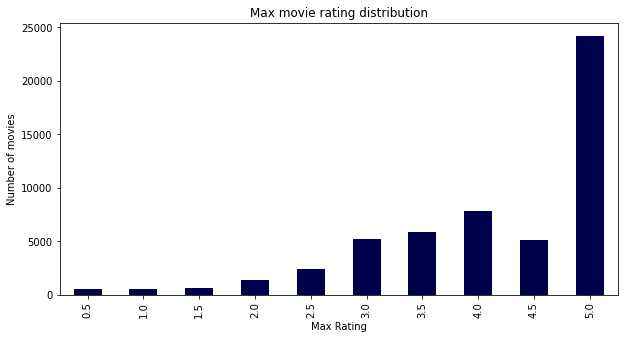

In [17]:
# max rating per movie distribution 

# creating a new dataframe with movieId and max rating
max_rating_per_movie = ratings_df[["movieId","rating"]].groupby("movieId").max().rename(columns={"rating":"Max Rating"})

# grouping by Max rating and creating a new column for Number of movies by max rating
max_rating_per_movie = pd.DataFrame(max_rating_per_movie.groupby("Max Rating").size()).rename(columns={0:"Number of movies"})

# plot the data
max_rating_per_movie.plot(kind="bar", 
                            legend=False, 
                            ylabel = "Number of movies", 
                            title = "Max movie rating distribution", 
                            figsize = (10,5), 
                            colormap = "seismic")

plt.show()

### 4. Printing out the 10 most rated movies 

In [18]:
# creating a list of indexes for the 10 movies with most ratings
top_10 = ratings_df["movieId"].value_counts()[:10]
top_10_list = top_10.index.tolist()

# printing out the movie names from the list of indexes and movies dataframe
print("Top 10 movies :")
for movie_id,i in zip(top_10_list,range(1,11)) : 
    print(i," - ",movies_df[movies_df["movieId"]==movie_id]["title"].values[0])


Top 10 movies :
1  -  Shawshank Redemption, The (1994)
2  -  Forrest Gump (1994)
3  -  Pulp Fiction (1994)
4  -  Silence of the Lambs, The (1991)
5  -  Matrix, The (1999)
6  -  Star Wars: Episode IV - A New Hope (1977)
7  -  Jurassic Park (1993)
8  -  Schindler's List (1993)
9  -  Braveheart (1995)
10  -  Toy Story (1995)


### 5. Plotting the mean rating for the 10 movies 


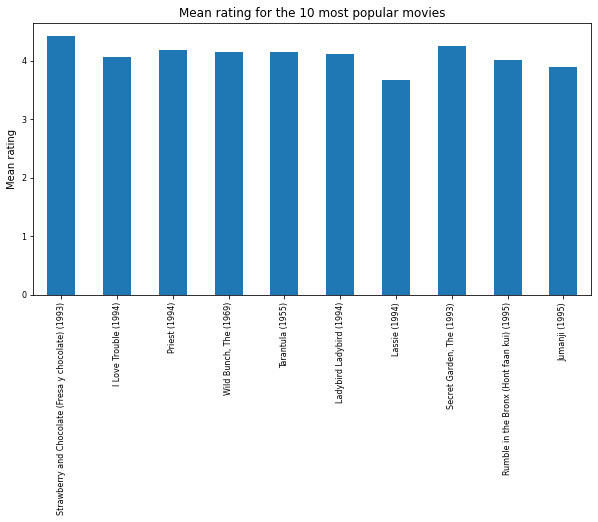

In [19]:
# using the same dataframe from before to grab the indexes
top_10 = pd.DataFrame(top_10).rename(columns={"movieId":"Number of ratings"})
top_10["Movie Id"]= top_10.index

# making a new dataframe with the 10 movies and their mean rating
top_10_mean_rating = ratings_df[ratings_df["movieId"].isin(top_10_list)].drop(labels="userId",axis=1).groupby("movieId").mean().rename(columns={"rating":"Mean Rating"})
top_10_mean_rating["Title"] = movies_df["title"][top_10.index]
top_10_mean_rating["Number of ratings"]= top_10["Number of ratings"]

# sort the dataframe as to have the most watched movie first
top_10_mean_rating = top_10_mean_rating.sort_values(by="Number of ratings",ascending=False)

# plot the data
top_10_mean_rating.plot(kind="bar",
                            x="Title",
                            y="Mean Rating", 
                            title = "Mean rating for the 10 most popular movies", 
                            legend = False, 
                            ylabel = "Mean rating", 
                            xlabel = "",
                            figsize = (10,5), 
                            fontsize = 8, 
                            )

plt.show()

### 6. Plotting the distribution of number of movies over the years 


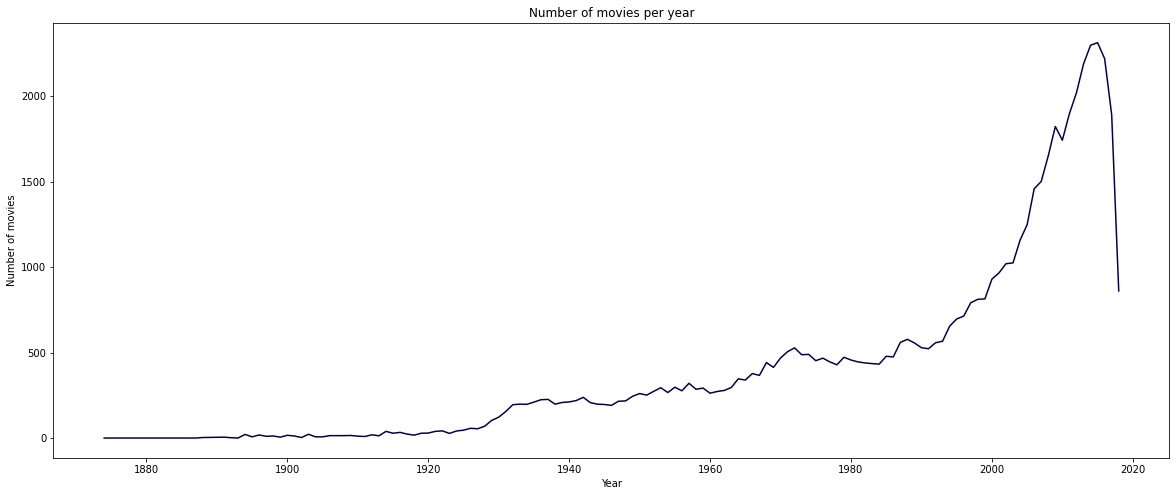

In [20]:
movies_per_year = movies_df[["title"]]

# grabbing the year 
movies_per_year["Year"] = movies_per_year.title.str.extract("(\(\d\d\d\d\))",expand=False) # this technique i found in this video : https://www.youtube.com/watch?v=YLOJfN9T9NU

# taking away the parenthesis
movies_per_year["Year"] = movies_per_year.Year.str.extract("(\d\d\d\d)",expand=False)

# cleaning the year column and changing its datatype
movies_per_year = movies_per_year.dropna().astype({"Year":"int32"})

# grouping by year and adding a column for Number of movies, then sorting the dataframe by year values 
movies_per_year = pd.DataFrame(movies_per_year.dropna().drop(labels="title",axis=1).value_counts()).rename(columns={0:"Number of movies"}).sort_values("Year",ascending=True).reset_index()


#movies_per_year
# plot the data
movies_per_year.plot(kind="line", 
                        x="Year",
                        y="Number of movies",
                        figsize= (20,8),
                        title = "Number of movies per year",
                        legend = False, 
                        ylabel = "Number of movies",
                        colormap = "seismic" )

plt.show()

### 7. Number of ratings by movie ID. 

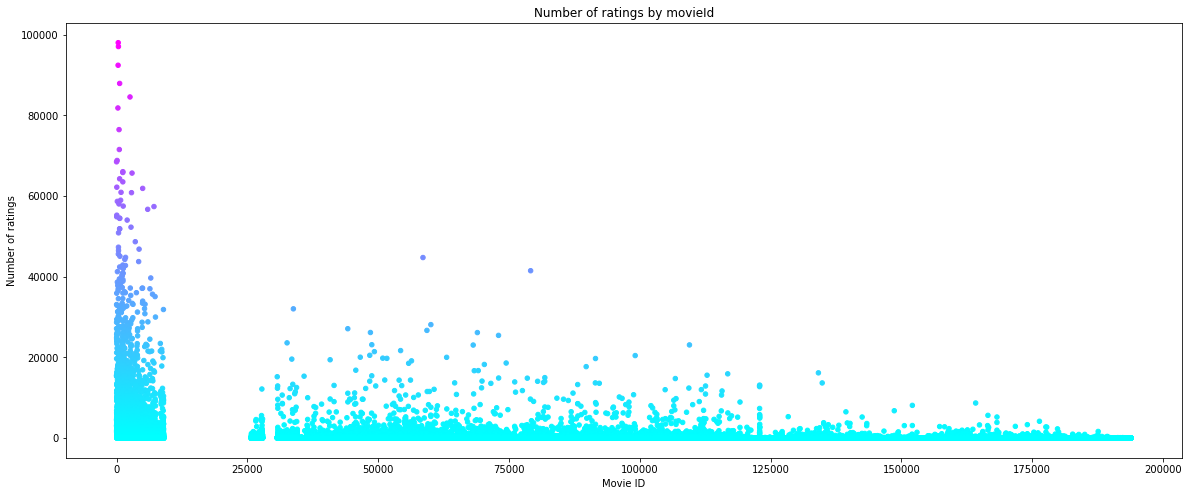

In [21]:
# creating a dataframe with movie Id and number of ratings for each movie
ratings_per_movie = pd.DataFrame(ratings_df["movieId"].value_counts()).reset_index().rename(columns={"movieId":"Number of ratings","index":"Movie ID"})

# plot the data
ratings_per_movie.plot.scatter(
                        x="Movie ID",
                        y="Number of ratings", 
                        c = "Number of ratings",
                        figsize = (20,8),
                        colormap = "cool",
                        colorbar = False, 
                        title = "Number of ratings by movieId"
                        )

plt.show()

# 1.2 Sparse Matrix 
Making a sparse matrix on such a big dataset can be "costly", in most cases it would be hard for a normal computer to handle it if the data is not cleaned/reduced. Think about what data is of less importance to what we're building and could be removed. 

## Cleaning the data

The data that would be removed : 
- <u>users who never gave a rating higher than 2.5</u>: these users don't like any movies and won't be of much help for recommending movies
- <u>users who rated less than 5 movies</u> : In most cases we would want to recommend at least 5 movies, and since a user who rated less movies may not be a big cinephile, thus his ratings less relevant. 
- <u>movies that never received a rating higher than 2.5</u> : These are movies that no one ever liked and would not be recommended 
- <u>movies that received less than 500 rating</u>. These movies compared to most movies in the dataset are unpopular movies that we wouldn't recommend.

In [22]:
# necessary imports
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Finding out the data to clean based on users

In [23]:
#clean users

# users with less than 5 ratings : reason is we will suggest at least 5 movies, 
# user should have watched at least 5 movies to be a relevant cinephil
users_df = ratings_df[["userId","rating"]]
number_ratings_per_user = pd.DataFrame(users_df.groupby("userId").size()).rename(columns={0:"Number of ratings"})
users_to_remove = number_ratings_per_user[number_ratings_per_user["Number of ratings"]<5].index.to_list()

# users who gave a maximum rating of 2.5 on all their ratings, 
# users won't help to recommend any movie
max_rating_per_user = users_df.groupby("userId").max()
users_to_remove += max_rating_per_user[max_rating_per_user["rating"]<3].index.to_list()

#removing duplicates
users_to_remove = list(set(users_to_remove))
print(f"Number of users to remove : {len(users_to_remove)}")

Number of users to remove : 16603


### Finding out the data to clean based on movies 

In [24]:
#clean movies

# movies with 3 or lower maximum rating
# a movie that never received a rating higher than 3 is a movie no one actually likes 
# thus we won't recommend it
movies_sub_df = ratings_df[["movieId","rating"]]
movies_low_max = movies_sub_df.groupby("movieId").max()
movies_to_remove = movies_low_max[movies_low_max["rating"]<3.5].index.to_list()

# movies with low number of ratings ( lower than 1000 )
# movies who received less than 1000 movies are unpopular movies we wouldn't recommend
movies_low_n_ratings = pd.DataFrame(movies_sub_df.groupby("movieId").size()).rename(columns={0:"Number of ratings"})
movies_to_remove += movies_low_n_ratings[movies_low_n_ratings["Number of ratings"]<500].index.to_list()


#removing duplicates 
movies_to_remove = list(set(movies_to_remove))
print(f"Number of movies to remove : {len(movies_to_remove)}")

Number of movies to remove : 48339


### Removing the data 

In [25]:
# deleting the chosen data 

#removing users  
clean_ratings_df = ratings_df.drop(ratings_df[ratings_df.userId.isin(users_to_remove)].index)

#removing movies 
clean_ratings_df = clean_ratings_df.drop(clean_ratings_df[clean_ratings_df.movieId.isin(movies_to_remove)].index)

print(f"Removed {len(ratings_df) - len(clean_ratings_df)} lines of data")

Removed 1740683 lines of data


## Creating the sparse matrix

In [26]:
# filling the missing data with zeros
movies_users = clean_ratings_df.pivot(index="movieId",columns="userId",values="rating").fillna(0)

#creating the csr matrix
movies_users_matrix = csr_matrix(movies_users.values)

In [27]:
# instantiating a KNN model
model_knn = NearestNeighbors(metric = "cosine",algorithm = "brute",n_neighbors = 20)

# fit model to sparse matrix
model_knn.fit(movies_users_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

# Recommender function

In [49]:
def recommender(movie, data, model, n_recommendations=5): 
    """ Function for recommending a movie 
    Input : 
        - the movie name ( not sensitive to upper or lowercase)
        - the sparse matrix
        - the model
        - number of movies to recommend, default value is 5
    Output is a list of movie names """

    #fit the model to the data
    model.fit(data)

    # selecting the movie based on the name given, using fuzzywuzzy process
    movie_index = process.extractOne(movie,movies_df["title"])[2]

    # getting the nearest neighbors
    distances,indexes = model.kneighbors(data[movie_index],n_neighbors = n_recommendations)

    # printing the nearest neighbors
    for idx in indexes : 
        suggestions_list = movies_df["title"][idx].values

    # find the index of the suggested movie to remove it 
    movie_i = np.where(suggestions_list == movie)

    # removing the movie from the list
    np.delete(suggestions_list,movie_i)

    for i,element in enumerate(suggestions_list) :
        print(i+1,"- ",element)

recommender("batman",movies_users_matrix,model_knn,5)

1 -  Batman Forever (1995)
2 -  Here Comes Cookie (1935)
3 -  Bird of Prey (1996)
4 -  Next Step, The (1997)
5 -  Bananas (1971)


In [51]:
#Getting the movie name
while True:
    try:
        movie_name = input("Please enter a movie name ")
        if type(movie_name)!= str :
            raise TypeError("Please enter a valid movie name")
        break
    except TypeError as err :
        print(err)

while True:
    try:
        n_recomm = int(input("Recommend a list of how many movies ?"))
        if not isinstance(n_recomm,(int,float)) or isinstance(n_recomm,bool):
            raise TypeError("Please enter a number")
        elif n_recomm ==  0 :
            raise ValueError("Number of suggestions cannot be 0")
        elif n_recomm <0 :
            raise ValueError("Please enter a number higher than 0")
        break
    except (TypeError,ValueError) as err :
        print(err)


recommender(movie_name,movies_users_matrix,model_knn,n_recomm)


1 -  Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)
2 -  Road to Singapore (1940)
3 -  China Moon (1994)
4 -  Time of Favor (Ha-Hesder) (2000)
5 -  Bad News Bears Go to Japan, The (1978)


## 1.3 - b)

There are generally 2 types of recommender systems : 
- Content based filtering 
- Collaborative based filtering 

### <u>Content based filtering </u>

The content based filtering system is a system where we need to know how does the content of the movie look like or in what categories it could fit. The most common way to classify movies is into genres, and to have a more accurate recommending system one would need to know approximately what is the percentage of presence of each genre in each movie. 

The information about the genres of each movie will help us determine the "taste" of each user, and we will use that to predict their ratings for movies they haven't watched based on what genre those movies are, and how did that same user rate those genres before, and this way we will be able to recommend for each user the movies that we would have predicted they would give them the highest rating. 

To summarize : 
- We need the movie content categories ( genres in this case )
- We find out the "taste" of each user based on the ratings given to different genres, a Linear Regression would work perfectly for this. 
- We predict the ratings for the movies that the user haven't watched yet. 
- We recommend the movies with highest predicted rating. 

### <u>Collaborative based filtering </u>
As watching every single movie and setting up how much percent of the movie belongs to each genre can be quite difficult, time consuming and very subjective, the collaborative based filtering is here to save the day. This system works by finding out what the other users who gave similar ratings to the same movies ( thus have the same taste in movies) as the main user we are trying to recommend movies to, and then recommending movies that these users have liked and the main user haven't watched yet. 

Summary : 
- We find out the users who gave similar or close ratings to the main user, a KNN works best for this kind of systems.
- We find out movies those users liked that the main user never rated and recommend them.


# Källor : 

- Youtube : 
    - https://www.youtube.com/watch?v=YLOJfN9T9NU
    - https://www.youtube.com/watch?v=EjOlN6uVBOg
